# Task_1 : Perform Data Cleaning
#### Clean a dataset by removing missing values and outliers.

In [1]:
## As the dataset is categorical i have imported pandas library.
## numpy is used to perform mathematical operations in dataset like the amount contains numerical values.
## sklearn is used here to find out mean and replace it once.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer as si
import numpy as np
import pandas as pd

In [2]:
## importing data set
file_location = pd.read_csv("C:/Users/0863a/OneDrive/Desktop/Data analyst/dashboards/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv", encoding = 'unicode_escape')

In [3]:
## shape tells us the rows and column in data
file_location.shape

(11251, 15)

In [4]:
## size tells us about rows*columns.
file_location.size

168765

In [5]:
## info helps us in knowing the missing values from each column and the datatype.
file_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
## this drop method is used to remove columns from dataset with proving axis and to change in original dataset we use inplace.
file_location.drop(['Status','unnamed1'], axis= 1,inplace= True)
file_location

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [7]:
## we came to know that amount has 12 missing values
file_location.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
null_values=file_location.isnull()
null_values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
## removing missing values
file_location.dropna(inplace= True) 
file_location.isnull().sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

<Axes: >

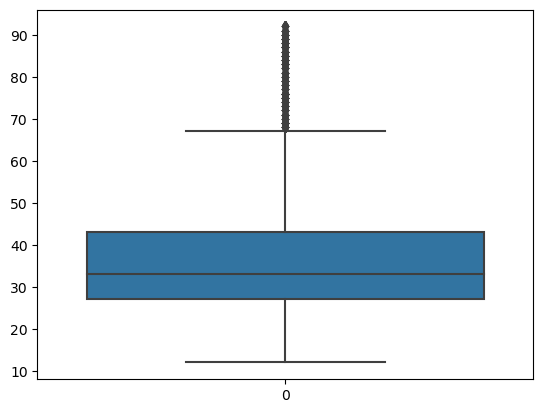

In [10]:
sns.boxplot( file_location['Age'])

<Axes: >

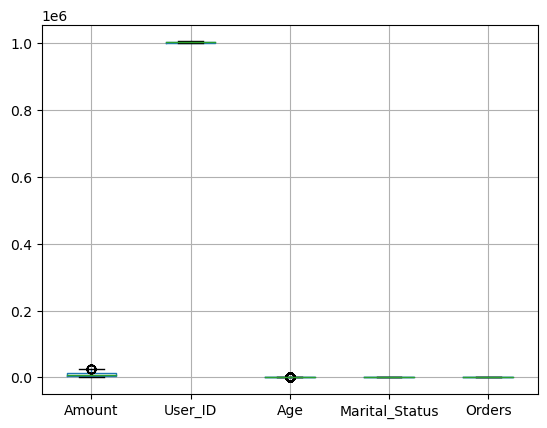

In [11]:
## to find outliers box plot is the best way to identify
numeric_columns = ['Amount','User_ID','Age','Marital_Status','Orders']   
file_location.boxplot(numeric_columns)

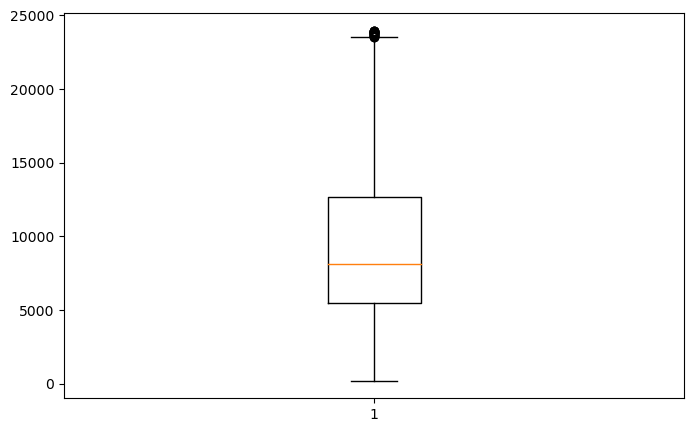

In [12]:
## we can see some outliers in our amount column
figure = plt.figure(figsize =(8, 5))  
plt.boxplot(file_location["Amount"]) 
plt.show() 

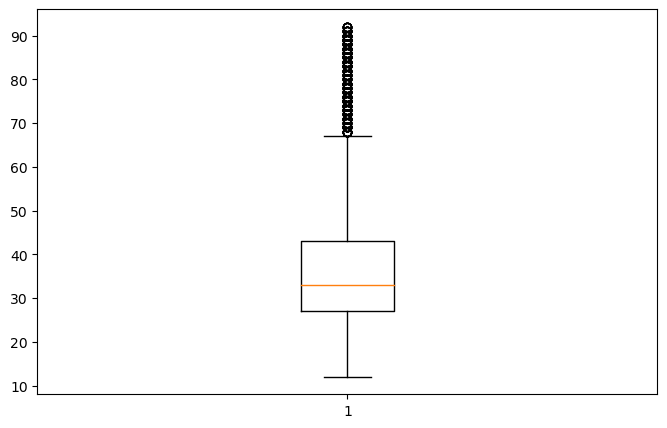

In [13]:
## we can see outliers in age
figure = plt.figure(figsize =(8, 5))  
plt.boxplot(file_location["Age"]) 
plt.show() 

In [14]:
## for setting the min and max value of age 
for x in ['Amount']:
    q75,q25 = np.percentile(file_location.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    file_location.loc[file_location[x] < min,x] = np.nan
    file_location.loc[file_location[x] > max,x] = np.nan

In [15]:
## finding the out of range values in amount
file_location.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              19
dtype: int64

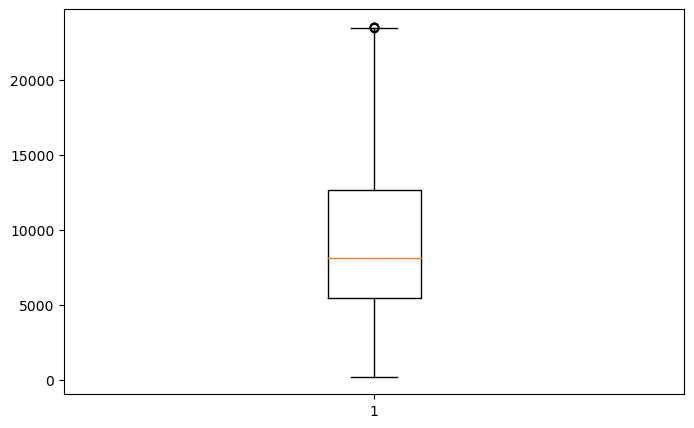

In [16]:
## we have removed the outliers
file_location = file_location.dropna(axis = 0)
file_location.isnull().sum()
figure = plt.figure(figsize =(8, 5))  
plt.boxplot(file_location["Amount"]) 
plt.show() 

In [17]:
## setiing the min and max value for age
for x in ['Age']:
    q75,q25 = np.percentile(file_location.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    file_location.loc[file_location[x] < min,x] = np.nan
    file_location.loc[file_location[x] > max,x] = np.nan

In [18]:
## cheacking for out of range values
file_location.isnull().sum()

User_ID               0
Cust_name             0
Product_ID            0
Gender                0
Age Group             0
Age                 283
Marital_Status        0
State                 0
Zone                  0
Occupation            0
Product_Category      0
Orders                0
Amount                0
dtype: int64

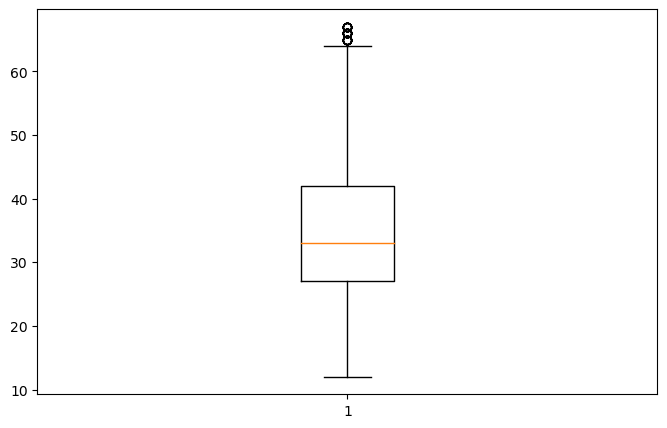

In [19]:
## removed the outliers
file_location = file_location.dropna(axis = 0)
file_location.isnull().sum()
figure = plt.figure(figsize =(8, 5))  
plt.boxplot(file_location["Age"]) 
plt.show() 

### Task_2: Calculate summary statistics (mean, median,mode, standard deviation) for a dataset

In [20]:
## we want to replace missing values in amount with mean so we have used simple imputer.
imputer = si(missing_values = np.nan,strategy ='mean') 
imputer = imputer.fit(file_location[['Amount']])
file_location[['Amount']] = imputer.transform(file_location[['Amount']])
file_location.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [21]:
## replacing missing values with median using fillna
file_location['Amount'] = file_location['Amount'].fillna(file_location['Amount'].median())
file_location.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [22]:
## replacing missing values with mode using fillna
file_location['Amount'] = file_location['Amount'].fillna(file_location['Amount'].mode())
file_location.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [23]:
standard_deviation=file_location.std()
standard_deviation

C:\Users\0863a\AppData\Local\Temp\ipykernel_18644\3035529136.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  standard_deviation=file_location.std()


User_ID           1718.013702
Age                 10.628544
Marital_Status       0.493676
Orders               1.115454
Amount            5187.955982
dtype: float64

In [24]:
## replacing missing values with standard deviation using fillna
file_location['Amount'] = file_location['Amount'].fillna(file_location['Amount'].std())
file_location.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [25]:
np.std(file_location)

C:\Users\0863a\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


User_ID           1717.935159
Age                 10.628058
Marital_Status       0.493654
Orders               1.115403
Amount            5187.718802
dtype: float64